In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pickle

In [2]:
from utils_Tadpole import TadpoleSet, TadpoleModule, Normalizer, train, val
with open('loaders', 'rb') as f:
    train_loader, val_loader, test_loader = pickle.load(f)

In [5]:
normalize = Normalizer(train_loader)
model = TadpoleModule(transforms=[])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001) # momentum=0.05)

In [ ]:
train_losses = []
val_losses = []
corrects = []
for epoch in range(1, 300):
    train_loss = train(epoch, model, train_loader, criterion, optimizer)
    val_loss, correct = val(model, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    corrects.append(correct)

In [8]:
train_losses[:10], val_losses[:10], corrects[:10]

([3337.939697265625,
  40.7375602722168,
  44.41550064086914,
  46.15717697143555,
  44.715152740478516,
  49.6042366027832,
  51.673828125,
  50.791015625,
  49.52939987182617,
  54.452919006347656],
 [68.00017528748245,
  0.6719034773580144,
  0.5607111855839075,
  0.5764586630831944,
  0.5553017777003599,
  0.5832003732745568,
  0.618924001629433,
  0.6188386852821607,
  0.5984296091486899,
  0.6903308611237601],
 [326, 317, 361, 368, 356, 367, 358, 348, 355, 356])

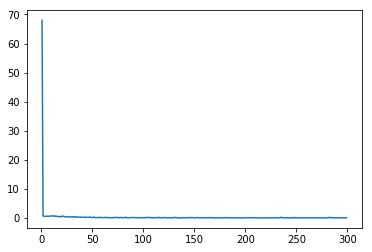

In [9]:
plt.plot(range(1, 300), val_losses)

In [12]:
torch.save(model, 'model')